# Group information

**Names:** Andreas Cisi Ramos e João Pedro de Moraes Novaes


**RAs:** 246932 e 174494

# **Machine Learning MC886/MO444 - Task \#2**: Model Selection for classification


### Objective:

To explore **Model Selection** techniques to select the best model and hyperparameters for a classification task.

#### **Dataset: Online Shoppers Purchasing Intention**

The dataset contains sessions of access to a website. Each user can have only one record for each year, in the case were the users were repeated.

Our classification objective is to determine when a given session will end with the user purchasing something.
This information is present in the "Revenue" column, which is our target.

Features and the corresponding descriptions:

- **Administrative**: Amount of times the user visited this type of page.
- **Administrative_Duration**: Time spent by the user visiting this type of page.
- **Informational**:  Amount of times the user visited this type of page.
- **Informational_Duration**: Time spent by the user visiting this type of page.
- **ProductRelated**:  Amount of times the user visited this type of page.
- **ProductRelated_Duration**: Time spent by the user visiting this type of page.
- **BounceRates**: The bounce rate is the percentage of visitors who enter the site from that page and then leave without triggering any other analytics action. This field contains the average bounce rate of the pages visited.
- **ExitRates**: The Exit rate is the percentage of visitors that exited the site on a specific page. This field contains the average bounce rate of the pages visited.
- **PageValues**: The page value is calculated by google analytics based on the values spent after visiting this page. This field contains the average page values of the pages visited.
- **SpecialDay**: The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
- **Month**: Month of the visit.
- **OperatingSystems**: The operating system used by the visitor. This field is coded as integer categories.
- **Browser**: The browser used by the visitor. This field is coded as integer categories.
- **Region**: The region where the user visited the site. This field is coded as integer categories.
- **TrafficType**: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct). This field is coded as integer categories.
- **VisitorType**: Visitor type as "New Visitor", "Returning Visitor", and "Other"
- **Weekend**: Boolean value indicating whether the date of the visit is a weekend day.
- **Revenue**: The target value, indicating where the visitor bought something (1) or did not bought anything (0).


### Imports necessários para esse  Trabalho

In [256]:
# Imports para todo o script
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import subplots

# Imports do SKLEARN que acrtedito que podem ser usados
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

This is the same folder as in the previous task, you can check your google drive to be sure if you need to copy it again.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [276]:
# load dataset locally
path = "online_shoppers_intention_mod.csv" # Change this to be the correct path if you added the dataset in a different location
shoppers = pd.read_csv(path)

### **Data analysis and preprocessing** (1.5 points)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Revenue`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think can help in understanding the dataset.

As in the previous task, preprocess the data, transform the categorical features with OneHotEncoding, and remember to scale continuous features to be in a similar scale between each other.


## Analisando os Dados

### Fizemos os seguintes passos como análise de dados

1. Busca por entradas nulas por colunas .


2. Divisão dos dados em treino e teste.
    - Vamos dividir 70% para treino e 30% para teste, como usual.


3. Plotamos os gráficos
    - Gráificos para as variáveis quantitativas / contínuas
    - Gráficos para as variáveis qualitativas / categóricas
    - Gráficos de mutual information
        - Exclusão de variáveis não siginificativas


4. Variáveis categóricas que precisaram ser tratadas com OneHotEncoding.
    - Variáveis Categóricas : **Month**, **OperatingSystems**, **Browser**, **Region**, **TrafficType**, **VisitorType**, **Weekend**.
    - Analisar se as colunas de treino e teste são iguais


5. Normalização dos dados utilizando o Standar Scaler.

### 1. Busca por entradas nulas por colunas 


- Pela tabela abiaxo SUM OF NULL ENTRIES não encontramos nenhuma coluna com dados faltantes.


In [258]:
## Analisando o dataset

print("COLUNAS")
print(shoppers.columns)

print("DATA\n")
print(shoppers)

print("\nSUM OF NULL ENTRIES\n")
print(shoppers.isnull().sum())



COLUNAS
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
DATA

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0      

### 2. Divisão dos dados em treino e teste.

In [294]:
#Training data
X = shoppers.drop(columns=['Revenue']) 
#Target variables
y = shoppers['Revenue']

# Divisão dos dados para o momento de Treinamento e para o momento de Test/Validação utilizando 30% para Teste e 70% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

### 3. Plotamos os gráficos

#### 3.1 Variáveis Quantitativas

- Como o target 'Revenue' é uma variávei categórica optamos por plotar os gráficos como boxplot e invertemos os eixos X e Y , pois o eixo Y que é categórico.

- Pelos Gráficos de boxplot, não conseguimos tirar muitas conclusões pois a grande maioria apresenta bastante outliers ou falto de balanceamento.
    - Das análises que podemos tirar são: 
        - SpecialDay parece se enquadrar mais com uma variável categórica, já que seus valores parecem bem discretos.
        - Vemos que os dados aparentam estar bem desbalanceados, ou seja, estão bem concentrados em uma região específica, diferente do usual distribuição normal que esperamos

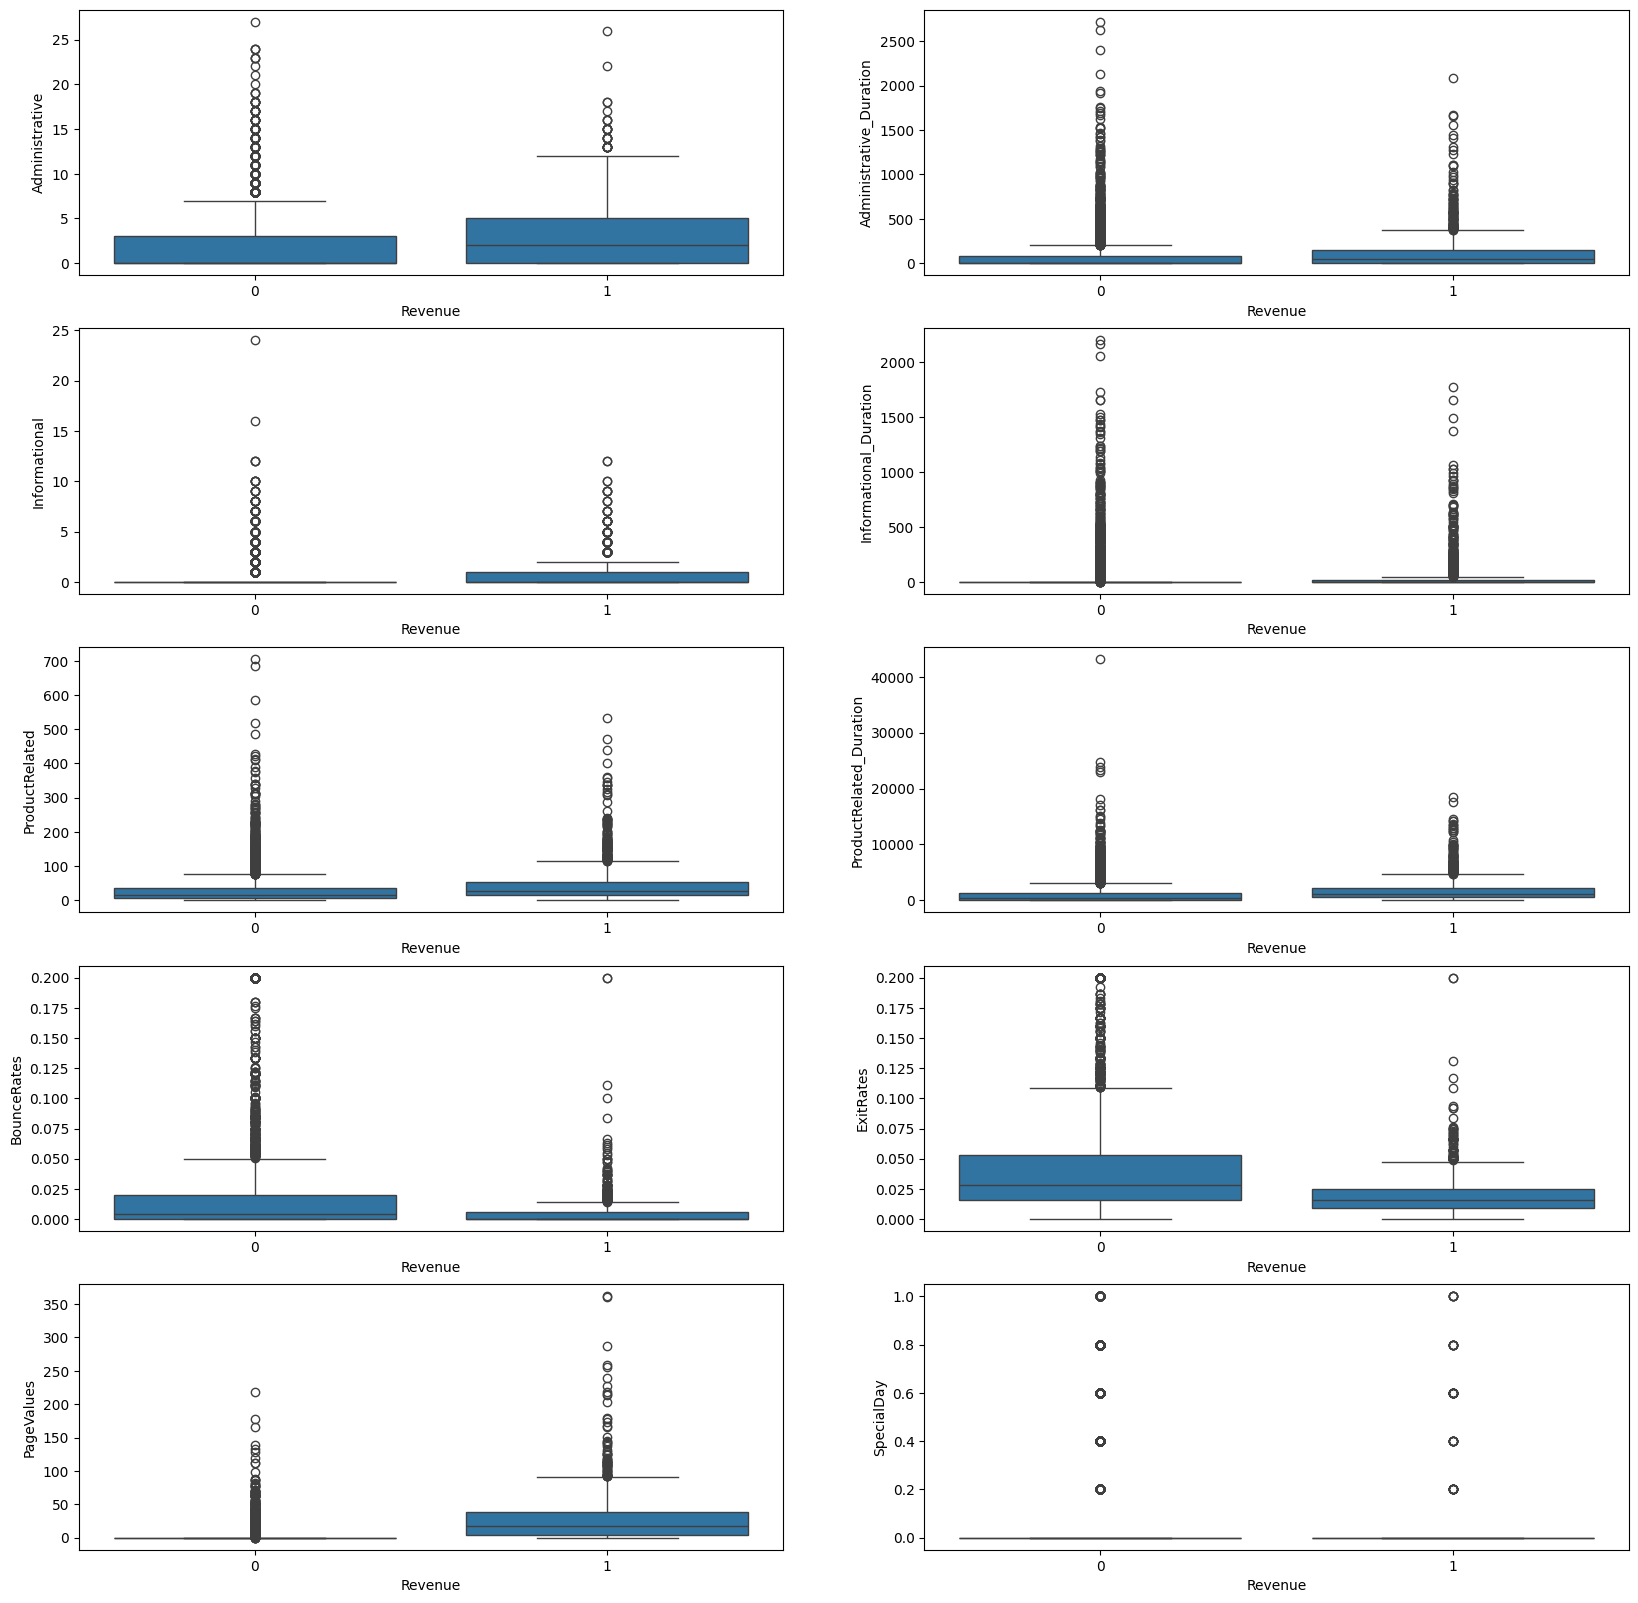

In [161]:
import matplotlib.pyplot as plt


continuous_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

subplots(nrows=5, ncols=2, figsize=(20,20))

for i, feature in enumerate(continuous_features, 1):

    plt.subplot(5, 2, i)
    
    # Plotar um boxplot para a variável contínua em relação à variável de destino 'Revenue'
    sns.boxplot(x=y_train, y=feature, data= X_train)
    plt.xlabel('Revenue')
    plt.ylabel(feature)



#### 3.2. Variáveis Categóricas

- Como para esse caso tanto o eixo X como o eixo Y serão variáveis categóricas encontramos como forma de plot os gráficos barras ou gráficos de contagem (countplot)

- Nesse modelo de gráfico ficou mais claro o caráter desbalanceado da maioria dos gráficos, sendo que a maioria dos dados de terminadas variáveis estão completamente acumulados em uma ou duas categorias entre várias.
    - Com isso, fica difícil a comparação de categorias, pois uma barra de contagem pode estar maior que a outra por termos mais amostrar de uma do que da outra, do que propriamente uma ser melhor que a outra na predição.

- Como exemplo, o Sistema Operacional ou Browser parece ser uma variável não significativa. já que a maior parte dos dados são de uma classe em específico, o modelo pode acabar decorando isso poluindo as métricas de erro

- Percebe-se que nenhuma categoria de variável parece ser decisiva para o Revenue, sendo que nenhuma coluna laranja(1) ultrapassou uma azul(1)

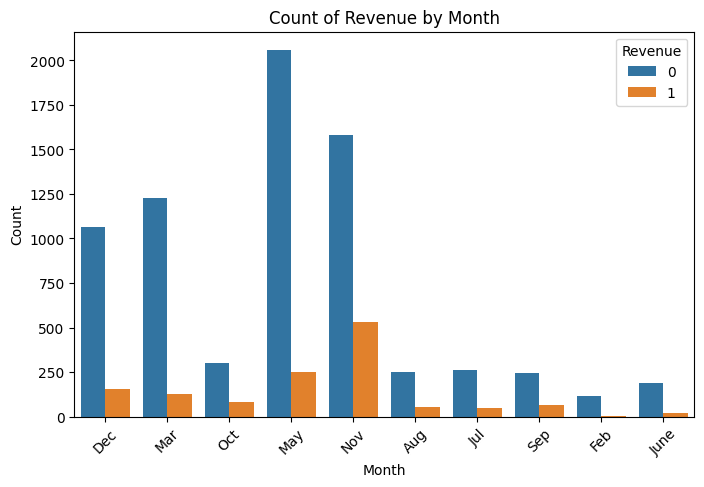

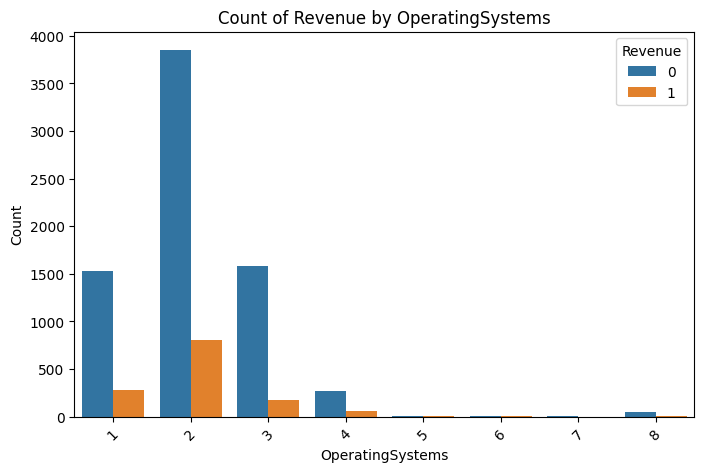

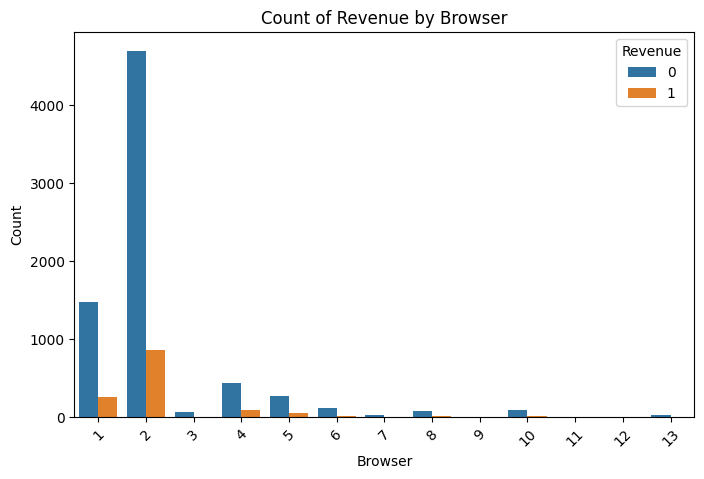

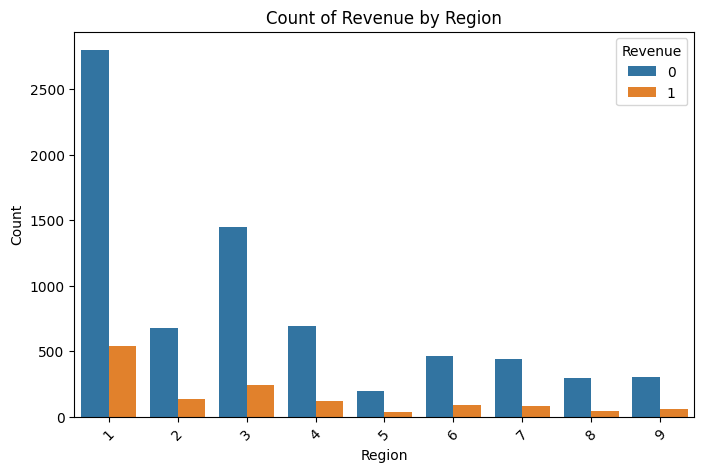

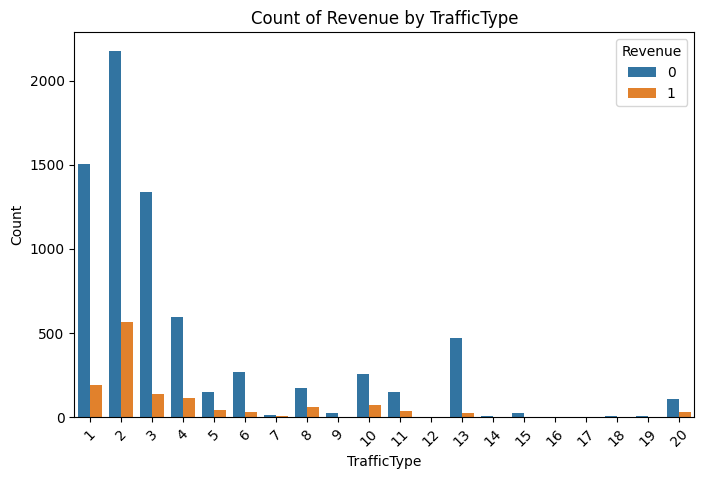

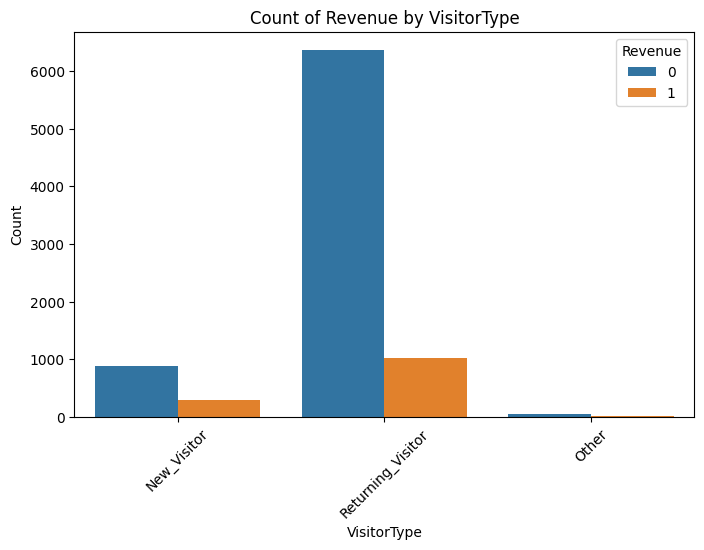

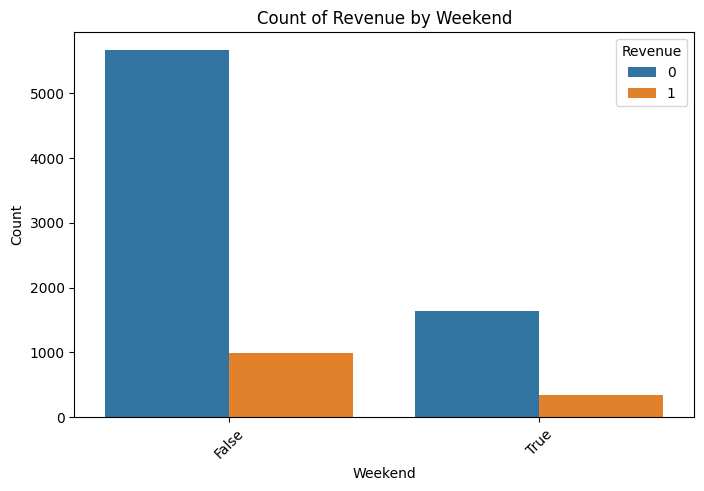

In [162]:
import matplotlib.pyplot as plt

categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue = y_train, data = X_train)
    plt.title(f'Count of Revenue by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Revenue', loc='upper right')
    plt.show()

#### 3.3 Mutual Information

- A medida do mutual information é uma maneira de estimar a dependência mútua de duas variáveis diferentes.

- Vemos pelo gráfico e pela tabela que temos as variáveisdiversas variáveis com um mutual information muito baixo. Como critério de significância colocamos em **>= 0.75%**. 
- Com isso, eliminaremos as colunas **Weekend, OperatingSystems, Browser, Region, Administrative, VisitorType**
- O valor nulo pode ser explicado pelo alto desbalanceamento dos dados, ou seja, a grande maioria dos dados pertence a uma mesma classe dentro dessas features, logo não são muito úteis para fazer uma regressão baseada nelas.


In [178]:
## check Mutal information

# Transformando dados categóricos usando OrdinalEncoder -> Apenas durante esse teste, depois utilizar o One-Hot encoding
mutual_x_train = X_train.copy()
ordinal_encoder = OrdinalEncoder()
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
mutual_x_train[categorical_features] = ordinal_encoder.fit_transform(mutual_x_train[categorical_features])

# Criar uma lista indicando quais variáveis são categóricas (True) e quais são contínuas (False)
discrete_features = [col in categorical_features for col in mutual_x_train.columns]

# Calculando informações mutuas entre variaveis e o alvo 
mt_info = mutual_info_regression(mutual_x_train, y_train, discrete_features= discrete_features)

# Imprimir o data frame com os valores de Mutual Information Ordenados
mi_df = pd.DataFrame(data={'Feature': mutual_x_train.columns, 'Mutual Information': mt_info})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)

                    Feature  Mutual Information
8                PageValues            0.163613
7                 ExitRates            0.038335
5   ProductRelated_Duration            0.032996
4            ProductRelated            0.030742
6               BounceRates            0.019496
1   Administrative_Duration            0.019148
3    Informational_Duration            0.016940
10                    Month            0.015653
2             Informational            0.013543
9                SpecialDay            0.013044
14              TrafficType            0.011812
15              VisitorType            0.007040
0            Administrative            0.005681
12                  Browser            0.002178
13                   Region            0.000000
11         OperatingSystems            0.000000
16                  Weekend            0.000000


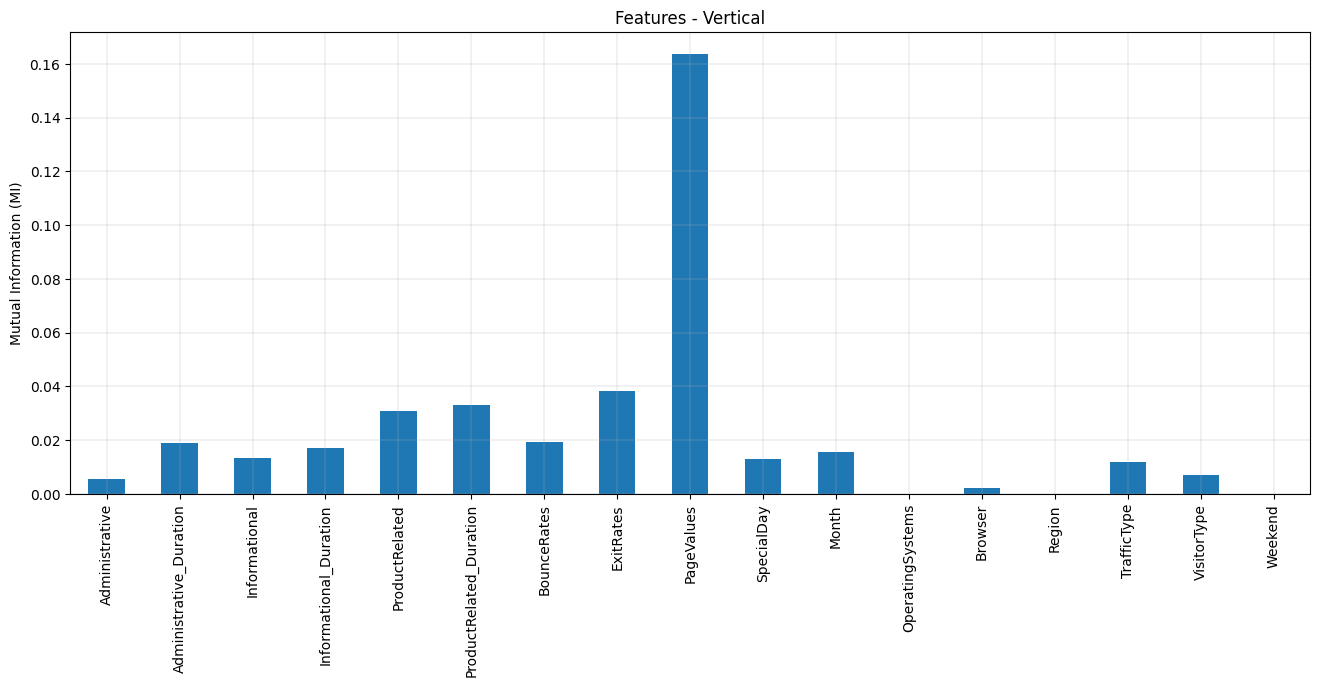

In [179]:
## Visualize the mutual information of each variable (Just run!)
## mt_info is the output of Sklearn function

mt_info_df = pd.Series(mt_info)
mt_info_df.index = X.columns
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

#### 3.3.1 Exclusão de variáveis com baixa significância

- Vamos retirar as variáveis que tiveram mutal information nulo na análise acima



In [296]:
X_train = X_train.drop(columns=[ 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'Administrative', 'VisitorType' ]) 
X_test = X_test.drop(columns=[ 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'Administrative', 'VisitorType' ]) 

### 4. Variáveis categóricas que precisaram ser tratadas com OneHotEncoding.

- Transofrmando dados categóricos em dados para serem utilizados no modelo . Para isso iremos utilizar a técnica one-hot encoding.


In [297]:
X_train = pd.get_dummies(X_train, columns=['Month', 'TrafficType'])
X_test = pd.get_dummies(X_test, columns=['Month', 'TrafficType'])

### 4.1 Analisar se as colunas de treino e teste são iguais
- Como há colunas no treino que não existem no teste vamos adicioná-las no Teste e preenchê-las como 0.
- Após isso, precisamos manter as colunas na mesma ordem para conseguir normalizar com o StandardScaler

In [298]:
missing_columns = set(X_train) - set(X_test)

print(missing_columns)

{'TrafficType_17', 'TrafficType_16', 'TrafficType_12'}


In [299]:
# Preencher colunas com 0
for col in missing_columns:
    X_test[col] = 0

# Reordene as colunas de X_test de acordo com a ordem em X_train
X_test = X_test.reindex(columns= X_train.columns)


In [300]:
print("Tamanho do conjunto de colunas distintas:", len(set(X_train) - set(X_test)))


Tamanho do conjunto de colunas distintas: 0


### 5. Normalização dos dados utilizando o Standard Scaler.


In [301]:
XColumns = X_train.columns

In [318]:
# Fazendo uma normalização dos dados com o StandarScaler do SKLearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Metric selection** (0.5 point)

As we're working with unbalanced data, the accuracy metric is not a good indicator of performance. Choose a metric and explain why that metric is a good fit for the online shopping intention problem. You don't need to implement the metric, only discuss it.

*Tip: Some common metrics are [balanced accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [f1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)*.


- Após pesquisar todas as métricas apresentadas acima tivemos a conclusão que a melhor para esse problema seria a F1-score.

- o F1-Score é uma escolha apropriada porque fornece uma avaliação equilibrada da capacidade do modelo de identificar corretamente as instâncias da classe positiva, levando em consideração tanto a precisão quanto o recall. 

- Analíticamente a F1-Score é a média harmônica entre precisão e recall. 
    - A precisão mede a proporção de instâncias positivas corretamente classificadas entre todas as instâncias classificadas como positivas, 
    - O recall mede a proporção de instâncias positivas corretamente classificadas entre todas as instâncias que são realmente positivas. 
    - Com isso, a média harmônica dessas duas medidas permite avaliar o equilíbrio entre a capacidade do modelo de fazer previsões precisas e sua capacidade de identificar corretamente instâncias da classe minoritária.


### **Feature selection** (2 points)


As seen in class, there are different ways to select which features to use in a machine learning model.

You should implement the "Forward stepwise selection" technique to find the best `p` features to be used in this task according to that method.

Use the [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model and the **K-fold cross-validation** as optimality criterion. You can use the Scikit-learn library, which has helper functions to create the [K-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) logic and the model. The metric used in K-fold should be the one chosen in the previous section!

Remember to save a new dataframe only with the selected features for the next steps! Also, use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data on the final part of the whole task.

## Correção dos índices

- Como separamos o conjunto inicial em treino e teste ele gerou um conjunto X_train e y_train, como um subconjunto de índices, ou seja , para acessar os dados de X_train e y_train, não se pode iterar de 0 a len e imprimir y_train[i], pois não necessariamente o indice **i** faz parte do subconjunto de indices.
- Com isso, o K-Fold acaba dando erros , pois ele faz um split dos indices contando que começa em 0 até len.
- Dessa forma, precisamos tratar os dados, com uma cópia de y_train e X_train, apenas para começarem do 0 e irem até len. Lembrando que isso deve ser feito de forma simultânea para que a entrada **i** do novo vetor X seja a correspondente a **i** do novo vetor y.

In [320]:
print("Indices do y_train\n ", y_train.index)

Indices do y_train
  Int64Index([ 8077,  1568,   462,   743,   222,  7954, 11348,  3912,   625,
            10658,
            ...
             4426,   466,  6265,  5734, 11284, 11964,  5191,  5390,   860,
             7270],
           dtype='int64', length=8631)


In [321]:
y_train_reset = y_train.copy()
y_train_reset.reset_index(drop=True, inplace=True)

In [322]:
print("Indices do y_train_reset\n ", y_train_reset.index)

Indices do y_train_reset
  RangeIndex(start=0, stop=8631, step=1)


## Passo a Passo da Implementação do Forward Stepwise Selection com K-Fold Cross-Validation

1. Fazemos o K-fold para poder dividir nosso conjunto de treino em outro treino e uma validação.
    - Iteramos pelos diferentes grupos formados e para cada configuração rodamos o Forward Stepwise
    - Depois, analisamos se o erro retornado para esse conjunto de treino e validação retornou o menor erro até então.
        - Caso tiver retornado nós atualizamos o Menor Erro e Salvamos o array de features que chegou nessa configuração.

2. Para fazer o Forward Stepwise seguimos os seguintes passos:
    - Iteramos p vezes , sendo o p o número de features.
    - Começamos do conjunto vazio e para cada iteração adicionamos nesse conjunto a melhor feature pela função beast_feature
    - Depois, analisamos se o erro retornado para esse Conjunto de features retornou o menor erro até então.
        -  - Caso tiver retornado nós atualizamos o Menor Erro e Salvamos o array de features que chegou nessa configuração.

3. Para fazer a escolha de melhor feature (best_feature) seguimos os seguintes passos:
    - Iteramos por cada feature que pode ser adicionada no análise.
    - Para cada feature adicionada nós fitamos o modelo de Regressão Logistica e calculamos o MSE.
    - Depois, analisamos se o MSE retornado para essa Configuração de features retornou o menor erro até então.
        - Caso tiver retornado nós atualizamos o Menor Erro e Salvamos essa feature como a melhor até agora.

4. Após isso, criamos um subconjunto dos dados apenas com as features selecionadas como as melhores.



In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

INFINITE = float('inf')

def best_feature(selected_features, candidate_features, X_train_fold, y_train_fold, X_validation_fold,y_validation_fold):
    
    best_feature = None
    min_i_error = INFINITE

    for feature in candidate_features:

        print(feature)
        
        current_features = selected_features.copy()
        current_features.append(feature)

        print(current_features)

        # Logistic Regression
        model = LogisticRegression()
        model.fit(X_train_fold[current_features], y_train_fold)
        
        # MSE
        mse_i= mean_squared_error(y_validation_fold, model.predict(X_validation_fold[current_features]))
        
        if mse_i < min_i_error:
            min_i_error = mse_i
            best_feature = feature
    
    return best_feature, min_i_error

def foward_stepwise(X_train_fold, y_train_fold, X_validation_fold, y_validation_fold):

    selected_features = [] 
    candidate_features = (XColumns).copy() 
    min_error = INFINITE
    best_i_feature = None

    for i in range(len(XColumns)):
        best_i_feature, min_i_error = best_feature(selected_features, candidate_features, X_train_fold, y_train_fold, X_validation_fold, y_validation_fold)
    
        selected_features.append(best_i_feature)
        candidate_features.remove(best_i_feature)
    
        if min_i_error < min_error:
            min_error = min_i_error
            best_features = selected_features.copy()

    return (best_features, min_error)



K = 2
kfold = KFold(n_splits = K , shuffle = False, random_state = None)

best_features = [] 
min_kfold_error = INFINITE

for (train_index, validation_index) in kfold.split(X_train):
   
    X_train_fold = X_train[train_index]
    X_validation_fold =  X_train[validation_index]
    y_train_fold = y_train_reset[train_index]
    y_validation_fold = y_train_reset[validation_index]

    best_current_features , min_current_error = foward_stepwise(X_train_fold, y_train_fold, X_validation_fold, y_validation_fold)

    if min_current_error < min_kfold_error:
        min_kfold_error = min_current_error
        best_features = best_current_features.copy()


X_train_selected = X_train[best_features]


## Observação

- Infelizmente esse código retorna um erro que não conseguimos resolver a tempo:
    - Ao utilizar StandardScaler para normalização em X_train acabamos perdendo a informação de acessar o vetor da seguinte forma: X_train['Informarional']
    - Com isso, nosso código não consegue acessar um subconjunto de X_train utilizando um subset de colunas como vetor exemplo: ['Informational', 'Month', ...]
        - Erro este que para de ocorrer ao não utilizar a Normalização
    - Porém, mesmo retirando a normalização acabamos em outro erro ao gerar um subgrupo pro K-Fold , já que fazemos esse subconjunto com um vetor de número exemplo: [1 ,2 ,3 ,4 ...]
        - Erro este que não ocorria ao utilizar a Normalização
    - Dessa forma, caímos em um erro cíclico, se arrumamos um caímos em outro e preferímos continuar o restante do trabalho do que nos manter travados aqui, já que nos encontramos sem tempo!

### **Model selection** (4 points)


This is the main section of the task. Using the features selected in the previous section, you should do a [**Grid search** with K-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to select the best classification model and its hyperparameters for this task. You can do it by hand if you want (you will need to do a nested loop for each tested parameter to have all combinations).

Remember to use only training data on K-fold validation, keeping a test set separated to estimate the performance of the model on unseen data.

You should train and validate the following models:
- [Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

As the Lasso model do not predict classes, you would need to convert the results to classes, and execute a GridSearch by hand. Alternatively, you can use only the Logistic regression model and test the regularization parameters ('l1' for Lasso regularization and 'l2' for Ridge) and show the best hyperparemeters when using each regularization. Remember to change the "C" parameter (the smaller the C, the stronger is the regularization).

Explore the documentation above and select which hyperparameters to vary, besides the regularization ones.

Also, you should test the polynomial transformation to find possible nonlinear relations between the features of the dataset. **Do not** use values above "3" for the `degree` of the polynomial transformation, as the number of features increases exponentially.

In short, you should use GridSearchCV (that uses K-fold internally) to get the best hyperparameters for the model using different regularization parameters, while also testing the polynomial transformation.

*Note: you will need to use the `fit` method more than once to test the different dataset transformations. Choose wisely which hyperparameters to test, as the GridSearch will test all combinations and can take very a long time to finish.*

In [325]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso

X_train_selected = X_train
X_test_selected = X_test

## Logistic Regression

In [331]:
# Grid Parameters
logistic_params = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'clf__max_iter': [1000]  
}

poly = PolynomialFeatures()
logistic = LogisticRegression(solver = 'liblinear')

# Create pipelines with polynomial transformation and model
logistic_pipeline = Pipeline([('poly', poly), ('clf', logistic)])

# Perform GridSearchCV for each model
logistic_grid = GridSearchCV(logistic_pipeline, param_grid=logistic_params, cv=5)

# Fit the models
logistic_grid.fit(X_train_selected, y_train)

# Get the best parameters and best scores
best_logistic_params = logistic_grid.best_params_
best_logistic_score = logistic_grid.best_score_

# Evaluate the performance on the test set
logistic_test_score = logistic_grid.score(X_test_selected, y_test)


# Print results
print("Logistic Regression:")
print("Best parameters:", best_logistic_params)
print("Best cross-validation score:", best_logistic_score)
print("Test set score:", logistic_test_score)

Logistic Regression:
Best parameters: {'clf__C': 0.1, 'clf__max_iter': 1000, 'clf__penalty': 'l1'}
Best cross-validation score: 0.8876156148580148
Test set score: 0.8869964855366316


## Ridge Classifier

In [328]:
# Grid Parameters

ridge_params = {
    'clf__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}
poly = PolynomialFeatures()
ridge = RidgeClassifier()

# Create pipelines with polynomial transformation and model
ridge_pipeline = Pipeline([('poly', poly), ('clf', ridge)])


# Perform GridSearchCV for each model
ridge_grid = GridSearchCV(ridge_pipeline, param_grid=ridge_params, cv=5)

# Fit the models
ridge_grid.fit(X_train_selected, y_train)

# Get the best parameters and best scores
best_ridge_params = ridge_grid.best_params_
best_ridge_score = ridge_grid.best_score_

# Evaluate the performance on the test set
ridge_test_score = ridge_grid.score(X_test_selected, y_test)

# Print results
print("\nRidge Classifier:")
print("Best parameters:", best_ridge_params)
print("Best cross-validation score:", best_ridge_score)
print("Test set score:", ridge_test_score)


Ridge Classifier:
Best parameters: {'clf__alpha': 0.01}
Best cross-validation score: 0.8825169199430221
Test set score: 0.8834820221681535


## Lasso

In [329]:
# Grid Parameters
lasso_params = {
    'clf__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

poly = PolynomialFeatures()
lasso = Lasso()

# Create pipelines with polynomial transformation and model
lasso_pipeline = Pipeline([('poly', poly), ('clf', lasso)])

# Perform GridSearchCV for each model
lasso_grid = GridSearchCV(lasso_pipeline, param_grid=lasso_params, cv=5)

# Fit the models
lasso_grid.fit(X_train_selected, y_train)

# Get the best parameters and best scores
best_lasso_params = lasso_grid.best_params_
best_lasso_score = lasso_grid.best_score_

# Evaluate the performance on the test set
lasso_test_score = lasso_grid.score(X_test_selected, y_test)

# Print results
print("\nLasso Regression:")
print("Best parameters:", best_lasso_params)
print("Best cross-validation score:", best_lasso_score)
print("Test set score:", lasso_test_score)


Lasso Regression:
Best parameters: {'clf__alpha': 0.01}
Best cross-validation score: 0.35620631569639116
Test set score: 0.3730403360240345


#### Discussion of key points

- **What was the best model hyperparemeters, according to cross validation?**
    - Segundo os resultados apresentados para cada modelo os melhores hyperparametros foram :
        - Logistic Regession :  C = 0.1, penalty =  l1 - Lasso Regularization
        - Ridge Classifier: alpha = 0.01
        - Lasso: apl´ha = 0.01
        
- **The models that use regularization were able to outperform the Logistic Regression without it? Explain why.**
    - As técnicas de regularização : **Lasso e Ridge** ajudam a evitar overfitting, mantendo os pesos pequenos e reduzindo a complexidade do modelo ao adicionar uma penalidade como hiperparâmetro.
    - Comparadas à regressão logística  essas técnicas tendem a ter um desempenho melhor ao analisar.
    - Analisando nossos dados vemos que o Lasso Regression apresentou um Test Score muito baixo, talvez tenha ocorrido um overfiting nos dados de treino resultando num péssimo test_socre
    - Comparando os modelos de Regressão Logistica com o Ridge Classifier vemos que o melhor resultado para Regressão Logistica foi com a penalidade l1 - Lasso, que apresenta grandes proximidades com o Ridge Regression.

### Threshold testing (1 point)

The three models trained in the previous session can return the probabilities of a sample being of the positive class.
The default threshold used to convert the results to the desired 0 or 1 output is `0.5`.

Use the K-fold cross validation to test different thresholds with the best models trained in the previous section (remember to train the best models with all train data and the best hyperparameters).

*If the model does not output probabilities, look for the `predic_proba` method*.

### Visualizing/interpreting weights (0.5 point)

As we're dealing with models that apply regularization terms, it's relatively easy to verify those results on the coefficient weights of the trained models.

Use the function below to visualize the weights of the final models.</br>
Also, train the three models again using *all* original features, and use the function below to compare how the weight distribution behaves on each of the models*.

\* *If no features were removed in previous sections, just compare the models with and without regularization*

In [332]:
## You don't need to change this cell!
import plotly.express as px

def plot_weights(model, columns):
  '''
  Plot the weights of the model for each column in an interative graph.
  "model" should be an sklearn model or follow the same interface, having the "coef_" attribute with the weights.

  -----
  Examples:
  plot_weights(classifier, X.columns)
  # for polynomial transformations
  plot_weights(classifier, poly.get_feature_names_out(X.columns))

  '''
  if not hasattr(model, 'coef_'):
    print("Invalid model!")
    return

  df_plot = pd.DataFrame(columns=['weight','columns'])
  df_plot['columns']= columns

  if len(columns) == len(model.coef_):
    df_plot['weight']=model.coef_
  else:
    df_plot['weight']=model.coef_[0]

  fig = px.bar(df_plot, x='columns', y='weight', color='weight')
  fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Plot the weights of your models!


#### Discussion of key points

- What conclusions can you have when looking at the different graphs?


In [ ]:
hasattr(obj, 'attribute')

### Testing (0.5 point)

Finally, choose your **Best** model in validation, test it and plot the normalized confusion matrix.

## Deadline

Thursday, May 2, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- May ~(3)~ 6 11:59 pm : grade * 0.75
- May ~(4)~ 7, 11:59 pm : grade * 0.5
- May ~(5)~ 8, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.